In [26]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math as math

#### Note: For the sake of academic integrity, I am not uploading the context for the examples below.

# Probability Theory and Statistics: Gamma Distribution

In [6]:
def rounded_percent(x):
    return round(x * 100, 2)

k = 4
theta = 5
x = 15

p = stats.gamma.cdf(x, k, scale=theta)
ans = p
res = rounded_percent(ans)
print(f"The probability that it takes less than 15 minutes to reboot the system is {res}%")

The probability that it takes less than 15 minutes to reboot the system is 35.28%


# Probability Theory and Statistics: Exponential Distribution

In [10]:
l_param = 0.2
mean = 5
blocks = 3

first_time = 7

first_block_cdf = stats.expon.cdf(first_time, scale=1/l_param)
print(first_block_cdf)

first_block_cdf_atMax = first_block_cdf ** blocks
print(first_block_cdf_atMax)

second_time = 10

second_block_cdf = stats.expon.cdf(second_time, scale=1/l_param)
print(second_block_cdf)

second_block_cdf_atMax = second_block_cdf ** blocks

prob_more_ten = 1 - second_block_cdf_atMax 
print(prob_more_ten)

first_res = rounded_percent(first_block_cdf_atMax)
second_res = rounded_percent(prob_more_ten)
print(f"The probability that the parallel compile of [REDACTED] will take 7 minutes or less is {first_res}%")
print(f"The probability that the parallel compile of [REDACTED] will take more than 10 minutes is {second_res}%")

0.7534030360583935
0.42764371923035677
0.8646647167633873
0.35353768522030193
The probability that the parallel compile of [REDACTED] will take 7 minutes or less is 42.76%
The probability that the parallel compile of [REDACTED] will take more than 10 minutes is 35.35%


# Probability Theory and Random Variable Generation: Transformation of a Random Uniform Variable

In [12]:
lp = 2.5 # define param

u = np.random.uniform(0, 1) # and then generate a random uniform variable

exp_r_var = stats.expon(scale=1/lp).ppf(u) # with u defined, plug into new var to generate an exponential random var
print(f"Sample with lambda {lp} is {exp_r_var}")

def generate_bernoulli(p=0.77):
    u = np.random.uniform(0, 1)  # generate a standard uniform random variable
    return 1 if u < p else 0  # return 1 with probability p otherwise return 0
bernoulli_sample = generate_bernoulli()
print(bernoulli_sample)

n = 15
p = 0.4 

u = np.random.uniform(0,1) # define u for rng

bs = stats.binom(n, p).ppf(u) # using a binomial discrete random var to solve for its param n & p 

print(f"Binomial sample with n = {n} and p = {p} is {bs}")

val = [0, 2, 7, 11]
prob = [0.2, 0.4, 0.3, 0.1]

dd = stats.rv_discrete(name='RNG', values=(val, prob)) # create discrete distribution

u = np.random.uniform(0, 1) # generate a random uniform variable

# generate a sample from dd
ds = dd.ppf(u)
print(f"Discrete sample: {ds}")

def generate_continuous(f, a, b, num_samples): # generates random samples from a continuous distribution using the inverse transform method
    u = np.random.uniform(size=num_samples)
    return np.cbrt(u)  # inverse CDF of f(x) = 3x^2 = x = u^(1/3)
# f is the PDF
a = 0 # min lim
b = 1 # max lim
num_samples = 1
continuous_sample = generate_continuous(lambda x: 3*x**2, a, b, num_samples)


print("Continuous Sample:", continuous_sample)

Sample with lambda 2.5 is 1.0606496219830215
0
Binomial sample with n = 15 and p = 0.4 is 7.0
Discrete sample: 0.0
Continuous Sample: [0.884105]


# Simulation Methods: Monte Carlo Simulation

In [13]:
# lambda params for poisson dist
lx = 3
ly = 5

num_samples = 1000000 # simulation samples

# generate samples from Poisson dist
x_s = np.random.poisson(lx, num_samples)
y_s = np.random.poisson(ly, num_samples)

cnt_x_grtr_y = np.sum(x_s > y_s) # count the number of times x > y

# estimate the probability
p_x_grtr_y = cnt_x_grtr_y / num_samples

print(f"Estimated probability P(x > y): {p_x_grtr_y}")

Estimated probability P(x > y): 0.18555


# Simulation and Probobility Theory: Biased Random Process

In [14]:
def biased_flip(): # returns 3 quarter heads and quarter tails
    return 'H' if np.random.uniform(0, 1) < 0.75 else 'T'

# function to simulate a fair coin flip using multiple biased flips
def fair_flip():
    while True:
        flips = [biased_flip() for _ in range(10)] # infinite loop that will continue running until it explicitly returns a value
        heads_count = flips.count('H')
        tails_count = flips.count('T')
        if heads_count > tails_count:# if heads_count == tails_count try again to basically make sure we dont favor one over the other
            return 'H' if np.random.uniform(0, 1) < 0.5 else 'T'
        elif tails_count > heads_count:
            return 'T' if np.random.uniform(0, 1) < 0.5 else 'H'
        
num_flips = 10000

# simulate multiple biased coin flips and count the outcomes
biased_flips = [biased_flip() for _ in range(num_flips)]
heads_count = biased_flips.count('H')
tails_count = biased_flips.count('T')

# output the count of heads and tails
print(f"Biased coin flips: Heads = {heads_count}, Tails = {tails_count}")

# simulate a large number of fair coin flips and count the outcomes
num_flips = 10000
fair_flips = [fair_flip() for _ in range(num_flips)]
heads_count = fair_flips.count('H')
tails_count = fair_flips.count('T')

print(f"Fair coin flips: Heads = {heads_count}, Tails = {tails_count}")

Biased coin flips: Heads = 7526, Tails = 2474
Fair coin flips: Heads = 5015, Tails = 4985


# Probability Theory and Random Variable Generation: Exponetial, Bernoulli, & Geometric Variables

In [15]:
def gen_exp(u, param=0.05):
    return -np.log(1 - u) / param # apply the inverse CDF to get exponential random variables

U = np.random.uniform(0, 1, 10000)
samples = gen_exp(U, param=0.05)
print(samples)

def bernoulli(u, p=0.4): # an array of uniform random variables u and a param p
    return (u < p).astype(int) # threshold comparison method to return random bernoulli var

U = np.random.uniform(0, 1, 10000)
bernoulli_samples = bernoulli(U, p=0.4)
print("Bernoulli Samples:", bernoulli_samples[:10])

def geometric(u, p=0.4): # an array of uniform random var u w/param p
    return np.ceil(np.log(1 - u) / np.log(1 - p)).astype(int) # inverse cdf formula to return geometric array

U = np.random.uniform(0, 1, 10000)
geometric_samples = geometric(U, p=0.4)
print("Geometric Samples:", geometric_samples[:10])

[18.13150795  3.92206671 19.8984079  ... 43.27804431 13.55624394
 26.90050808]
Bernoulli Samples: [0 1 0 0 0 0 0 0 0 0]
Geometric Samples: [1 5 2 5 2 2 1 5 1 3]


# Monte Carlo: Rejection Sampling

In [18]:
def target(x):
    return (2 / np.pi) * (1 / (1 + x**2))

def proposal(x):
    return 1 / 2  # uniform distribution over [-1, 1]

def rejection_sampling(n_samples):
    samples = []
    M = 4 / np.pi
    while len(samples) < n_samples:
        u = np.random.uniform(0, 1)
        if u <= target(x) / (M * proposal(x)):
            samples.append(x)
    return samples

samples = rejection_sampling(1000)
print(samples[:10]) 

u = 0.2388
v = 0.7533

x = 2 * u - 1 # calculation of x from u

accept = 1 / (2 * (1 + x**2)) # acceptance prob

accepted = v <= accept

print(f"x = {x}")
print(f"accept = {accept}")
print(f"v = {v}")
print(f"Accepted?: {accepted}")

u = 0.2063
v = 0.8097

x = 2 * u - 1

accept = 1 / (2 * (1 + x**2))

accepted = v <= accept

print(f"x = {x}")
print(f"accept = {accept: }")
print(f"v = {v}")
print(f"Accepted?: {accepted}")

[0.4143125432304906, -0.4815768569671901, 0.42276284062156533, -0.724462642649629, 0.9054235833718891, 0.610141929407136, -0.6251019998418084, 0.6437677651275182, 0.2830262119001017, -0.6990260725166944]
x = -0.5224
accept = 0.3928032906482901
v = 0.7533
Accepted?: False
x = -0.5873999999999999
accept =  0.371736499251516
v = 0.8097
Accepted?: False


# Markov Chains: Transition Probability Matrix

In [19]:
P = np.array([
    [0.5, 0.5, 0],
    [0, 0.5, 0.5],
    [0, 0.5, 0.5]
])

P2 = np.linalg.matrix_power(P, 2)
P3 = np.linalg.matrix_power(P, 3)
P4 = np.linalg.matrix_power(P, 4)

print("P^2:")
print(P2)
print("P^3:")
print(P3)
print("P^4:")
print(P4)

initial_state = np.array([1, 0, 0]) # at 7 AM

third_state = np.linalg.matrix_power(P, 3) @ initial_state # at 3 AM

print(f"Probability of nobody working in the lab at 10 am: {third_state[0]}")

P^2:
[[0.25 0.5  0.25]
 [0.   0.5  0.5 ]
 [0.   0.5  0.5 ]]
P^3:
[[0.125 0.5   0.375]
 [0.    0.5   0.5  ]
 [0.    0.5   0.5  ]]
P^4:
[[0.0625 0.5    0.4375]
 [0.     0.5    0.5   ]
 [0.     0.5    0.5   ]]
Probability of nobody working in the lab at 10 am: 0.125


# Rare Events Modeling: Poisson Processes

In [24]:
lr = 1 / 4  # incidents per year
t = 10  # years
l_t = lr * t  # poisson parameter for 10 years

P_0 = math.exp(-l_t) * (l_t**0) / math.factorial(0) 
P_1 = math.exp(-l_t) * (l_t**1) / math.factorial(1)
P_2 = math.exp(-l_t) * (l_t**2) / math.factorial(2)

probability = P_0 + P_1 + P_2

total_probability = round(probability * 100)

print(f"Probability that Mr. Z keeps his license for at least 10 years: {total_probability:}%")


Probability that Mr. Z keeps his license for at least 10 years: 54%


# Descriptive Statistics & Data Visualization (basic)

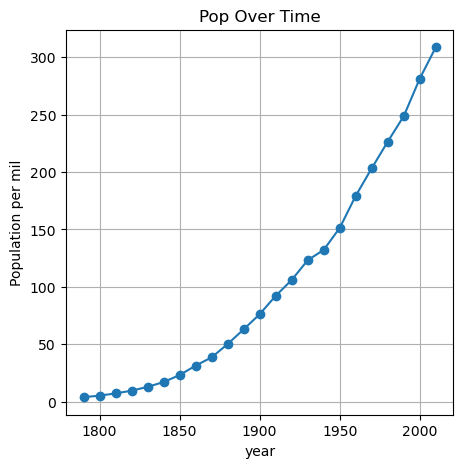

The population trend over time in the US is an exponential growth
The mean of 10-year pop increment is 13.854545454545455
The median increment is: 13.0
The variance increment is: 87.60354978354978


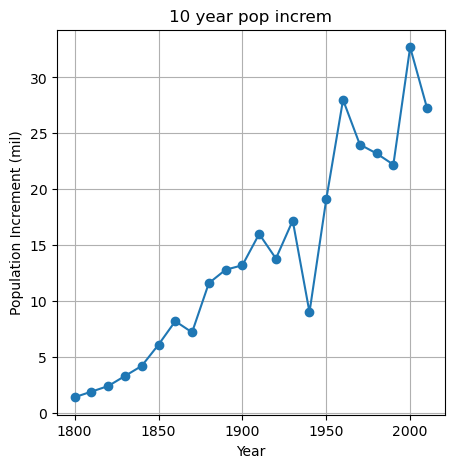

Following RPC formula, get % 1     35.897436
2     35.849057
3     33.333333
4     34.375000
5     32.558140
6     35.672515
7     35.344828
8     22.929936
9     30.051813
10    25.498008
11    20.952381
12    20.997375
13    14.967462
14    16.226415
15     7.305195
16    14.447806
17    18.506279
18    13.385388
19    11.411707
20     9.801325
21    13.148372
22     9.701493
Name: Population, dtype: float64 per increment
Mean of relative pop change is 22.380057356285803
Median of relative pop change is 20.974878140232473
Variance of relative pop change is 102.50379905134977


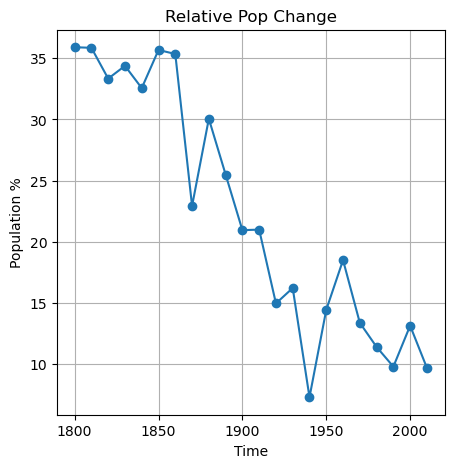

As the population increases, the average increment gets smnaller and smaller, and as time passes


In [28]:
data = [[1790, 1800, 1810, 1820, 1830, 1840, 1850, 1860, 1870, 1880, 1890, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010],
        [3.9, 5.3, 7.2, 9.6, 12.9, 17.1, 23.2, 31.4, 38.6, 50.2, 63.0, 76.2, 92.2, 106.0, 123.2, 132.2, 151.3, 179.3, 203.3, 226.5, 248.7, 281.4, 308.7]
]
height_df = pd.DataFrame({
    "Time": data[0],
    "Population": data[1]
})
plt.figure(figsize=(5, 5)) 
plt.plot(height_df["Time"], height_df["Population"], marker='o', linestyle='-', markersize=6)
plt.xlabel('year') 
plt.ylabel('Population per mil') 
plt.title('Pop Over Time') 
plt.grid(True) 
plt.show()
plt.close()
print("The population trend over time in the US is an exponential growth")

population_increments = height_df["Population"].diff().dropna()
print(f"The mean of 10-year pop increment is {population_increments.mean()}")
print(f"The median increment is: {population_increments.median()}")
print(f"The variance increment is: {population_increments.var()}")

plt.figure(figsize=(5, 5))
plt.plot(height_df['Time'][1:], population_increments, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Population Increment (mil)')
plt.title('10 year pop increm')
plt.grid(True)
plt.show()

rel_pop_change = population_increments / (height_df["Population"].shift(1).dropna()) * 100
print(f"Following RPC formula, get % {rel_pop_change} per increment")

print(f"Mean of relative pop change is {rel_pop_change.mean()}")
print(f"Median of relative pop change is {rel_pop_change.median()}")
print(f"Variance of relative pop change is {rel_pop_change.var()}")

plt.figure(figsize=(5,5))
plt.plot(height_df["Time"][1:], rel_pop_change, marker='o', linestyle='-')
plt.xlabel("Time")
plt.ylabel("Population %")
plt.title("Relative Pop Change")
plt.grid(True)
plt.show()
plt.close()
print("As the population increases, the average increment gets smnaller and smaller, and as time passes")


# Descriptive Statistics: Impact of Outliers

In [30]:
comp_list = [43, 37, 50, 51, 58, 105, 52, 45, 45, 10]
df = pd.DataFrame(comp_list, columns=["computer"])
print(f"Mean: {df['computer'].mean()}")
print(f"Median: {df['computer'].median()}")
print(f"Quantiles:\n"
      f"{df['computer'].quantile([0.25, 0.50, 0.75])}")
print(f"Standard Deviation: {df['computer'].std()}")

quartiles = df["computer"].quantile([0.25, 0.50, 0.75])
Q1 = quartiles[0.25]
Q3 = quartiles[0.75]
iqr = stats.iqr(df["computer"])

lower = Q1 - 1.5 * iqr
upper = Q3 + 1.5 * iqr
outliers = df[(df['computer'] < lower) | (df['computer'] > upper)]
print(f"Outliers: {outliers['computer'].tolist()}")

df_no_outliers = df[(df['computer'] >= lower) & (df['computer'] <= upper)]
mean_no_outliers = df_no_outliers['computer'].mean()
median_no_outliers = df_no_outliers['computer'].median()
quartiles_no_outliers = df_no_outliers['computer'].quantile([0.25, 0.5, 0.75])
std_dev_no_outliers = df_no_outliers['computer'].std()

print(f"Mean without outliers: {mean_no_outliers}")
print(f"Median without outliers: {median_no_outliers}")
print(f"Quartiles without outliers: \n" f"{quartiles_no_outliers}")
print(f"Standard Deviation without outliers: {std_dev_no_outliers}")

print("\nConclusion:")
print("Outliers will affect descriptive statistics. The presence of outliers generally inflates the mean and the standard deviation while having a lesser impact on the median and quartiles.")

Mean: 49.6
Median: 47.5
Quantiles:
0.25    43.50
0.50    47.50
0.75    51.75
Name: computer, dtype: float64
Standard Deviation: 23.476702399518455
Outliers: [105, 10]
Mean without outliers: 47.625
Median without outliers: 47.5
Quartiles without outliers: 
0.25    44.50
0.50    47.50
0.75    51.25
Name: computer, dtype: float64
Standard Deviation without outliers: 6.4572771793867245

Conclusion:
Outliers will affect descriptive statistics. The presence of outliers generally inflates the mean and the standard deviation while having a lesser impact on the median and quartiles.


# Discrete Probability Distribution: Maximum Likelihood Estimator, Method of Moments, & Parameter Estimation

In [31]:
sample = [3, 3, 3, 3, 3, 7, 7, 7]
df = pd.DataFrame(sample)
s_mean = df.mean()

mme = (7 - s_mean) / 4
print(f"The method of moments estimator: {mme}")

p3 = np.sum(df == 3)
p7 = np.sum(df == 7)
mle = p3 / (p3 + p7)
print(f"Maximum likelihood est: {mle}")

The method of moments estimator: 0    0.625
dtype: float64
Maximum likelihood est: 0    0.625
dtype: float64


# Statistical Inference & Hypothesis Testing: Quality Control & Decision-Making

In [34]:
n = 200  
x = 24  
prop = x / n 

conf = 0.96
alpha = 1 - conf
z_2 = stats.norm.ppf(1 - alpha/2)

moe = z_2 * np.sqrt((prop * (1 - prop)) / n)

lower = prop - moe
upper = prop + moe

print(f"96% Confidence Interval: ({lower}, {upper})")

claim = 0.10

if claim < lower or claim > upper:
    print("We have enough evidence at the 4% significance level")
else:
    print("We do not have sufficient evidence at 4% significance level")

conf_85 = 0.85
alpha_85 = 1 - conf_85
z_85 = stats.norm.ppf(1 - alpha_85/2)

moe_85 = z_85 * np.sqrt((prop * (1 - prop)) / n)

lower_85 = prop - moe_85
upper_85 = prop + moe_85

print(f"85% Confidence Interval: ({lower_85}, {upper_85})")

if claim < lower_85 or claim > upper_85:
    print("We have sufficient evidence to disprove claim at the 15% significance level")
else:
    print("We do not have sufficient evidence to disprove claim at the 15% significance level")

96% Confidence Interval: (0.07280844289046505, 0.16719155710953493)
We do not have sufficient evidence at 4% significance level
85% Confidence Interval: (0.086922085134124, 0.153077914865876)
We do not have sufficient evidence to disprove claim at the 15% significance level


# Pulling and Survey Results: Margin of Error

In [36]:
def moe(p, n, z=1.96):
    se = np.sqrt((p * (1 - p)) / n)
    moe = z * se
    return moe

prop = [0.45, 0.35, 0.10]
n = 900

for p in prop:
    me = moe(p, n)
    print(f"Proportion: {p*100}% | Marg err: {me*100}%")

Proportion: 45.0% | Marg err: 3.250292294548292%
Proportion: 35.0% | Marg err: 3.116201391295356%
Proportion: 10.0% | Marg err: 1.96%


# Confidence Intervals For Difference of Proportions

In [38]:
nA = 70
nB = 100
xA = 42
xB = 59
pA = xA / nA
pB = xB / nB
diff = pA - pB

SE = np.sqrt((pA * (1 - pA) / nA) + (pB * (1 - pB) / nB))
z = 1.96

moe = z * SE
lower = diff - moe
upper = diff + moe

print(f"DIfferences prop: {diff}")
print(f"Standard error: {SE}")
print(f"MArgin of error: {moe}")
print(f"95% CI: ({lower}, {upper})")

DIfferences prop: 0.010000000000000009
Standard error: 0.07646941498776769
MArgin of error: 0.14988005337602467
95% CI: (-0.13988005337602466, 0.15988005337602468)


# Hypothesis and Statistical Testing

In [40]:
data = [30, 50, 70]

s_size = len(data)
s_mean = np.mean(data)
s_variance = np.var(data, ddof=1)
dof = s_size - 1
alpha = 0.10

chi2_05 = stats.chi2.ppf(alpha / 2, dof)
chi2_95 = stats.chi2.ppf(1 - alpha / 2, dof)

ci_lower = (dof * s_variance) / chi2_95
ci_upper = (dof * s_variance) / chi2_05

std_lower = np.sqrt(ci_lower)
std_upper = np.sqrt(ci_upper)

print(f"Sample Mean: {s_mean}")
print(f"Sample Variance: {s_variance}")
print(f"Chi-Square Lower: {chi2_05}")
print(f"Chi-Square Upper: {chi2_95}")
print(f"90% Confidence Interval for Variance: ({ci_lower}, {ci_upper})")
print(f"90% Confidence Interval for Standard Deviation: ({std_lower}, {std_upper})")

Sample Mean: 50.0
Sample Variance: 400.0
Chi-Square Lower: 0.10258658877510106
Chi-Square Upper: 5.991464547107979
90% Confidence Interval for Variance: (133.52328027813368, 7798.290298489476)
90% Confidence Interval for Standard Deviation: (11.555227400537545, 88.30792885403595)


# Regression Analysis: R-Squared in Historical Population Data

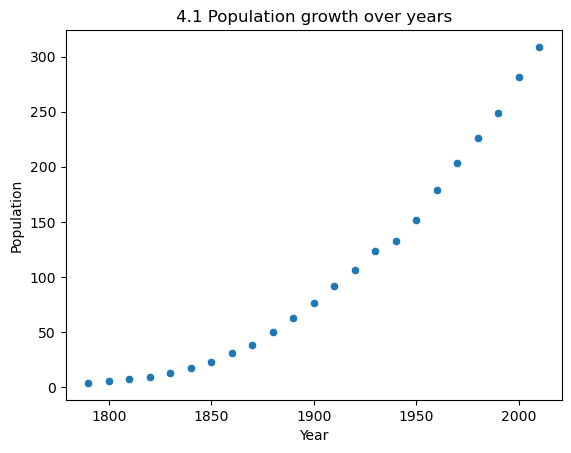

Linear model coefficients: a0 = -2480.7019762899877, a1 = 1.3603557312260777
R-squared for Linear Model: 0.9193285511819065


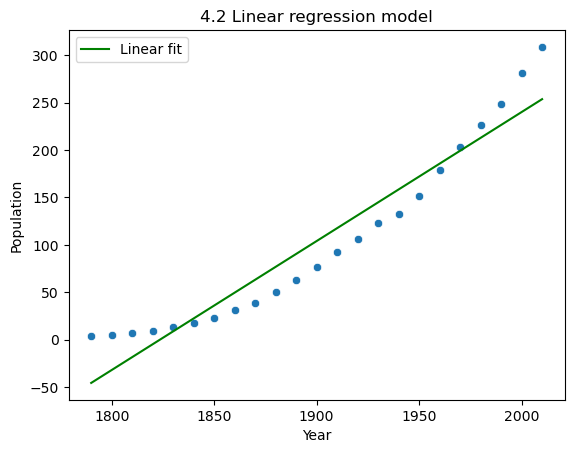

Quadratic model coefficients: a2 = 0.006773517907417657, a1 = -24.379012317045255, a0 = 21941.894190859086
R-squared for Quadratic Model: 0.9991027336434126


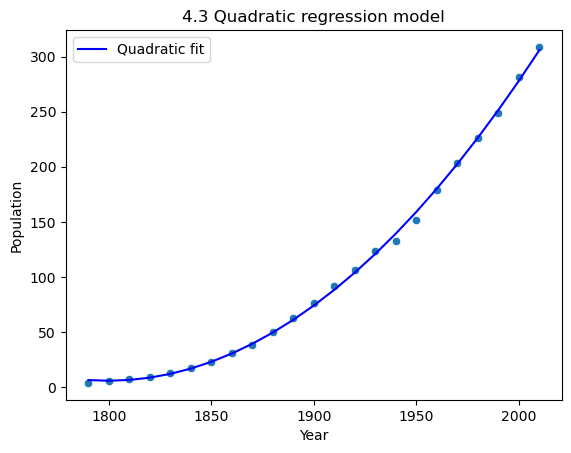

In [42]:
# Data
years = np.array([1790, 1800, 1810, 1820, 1830, 1840, 1850, 1860, 1870, 1880, 1890,
                  1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000,
                  2010])
population = np.array([3.9, 5.3, 7.2, 9.6, 12.9, 17.1, 23.2, 31.4, 38.6, 50.2, 63.0,
                       76.2, 92.2, 106.0, 123.2, 132.2, 151.3, 179.3, 203.3, 226.5, 248.7,
                       281.4, 308.7])

df = pd.DataFrame({
    "year": years,
    "population": population
})

# Scatter plot
sns.scatterplot(data=df, x="year", y="population")
plt.title("4.1 Population growth over years")
plt.xlabel("Year")
plt.ylabel("Population")
plt.show()

# Linear regression model
def linear_model(x, a, b):
    return a * x + b

popt, _ = curve_fit(linear_model, years, population)
a1, a0 = popt

pred_lin_y = linear_model(years, a1, a0)

# R-squared for linear model
residual_sum = np.sum((population - pred_lin_y) ** 2)
total_sum = np.sum((population - np.mean(population)) ** 2)
r2_linear = 1 - (residual_sum / total_sum)

print(f"Linear model coefficients: a0 = {a0}, a1 = {a1}")
print(f"R-squared for Linear Model: {r2_linear}")

sns.scatterplot(data=df, x="year", y="population")
sns.lineplot(x=years, y=pred_lin_y, color="green", label="Linear fit")
plt.title("4.2 Linear regression model")
plt.xlabel("Year")
plt.ylabel("Population")
plt.legend()
plt.show()

# Quadratic non-linear regression model
def quadratic_model(x, a2, a1, a0):
    return a2 * x ** 2 + a1 * x + a0

popt, _ = curve_fit(quadratic_model, years, population)
quad_a2, quad_a1, quad_a0 = popt

pred_quad_y = quadratic_model(years, quad_a2, quad_a1, quad_a0)

# R-squared for quadratic model
residual_sum = np.sum((population - pred_quad_y) ** 2)
total_sum = np.sum((population - np.mean(population)) ** 2)
r2_quadratic = 1 - (residual_sum / total_sum)

print(f"Quadratic model coefficients: a2 = {quad_a2}, a1 = {quad_a1}, a0 = {quad_a0}")
print(f"R-squared for Quadratic Model: {r2_quadratic}")

sns.scatterplot(data=df, x="year", y="population")
sns.lineplot(x=years, y=pred_quad_y, color="blue", label="Quadratic fit")
plt.title("4.3 Quadratic regression model")
plt.xlabel("Year")
plt.ylabel("Population")
plt.legend()
plt.show()

# Hypothesis Testing: Variance & Standard Deviation of a Population

In [43]:
data = [30, 50, 70]

s_size = len(data)
s_mean = np.mean(data)
s_variance = np.var(data, ddof=1)
dof = s_size - 1
alpha = 0.10

chi2_05 = stats.chi2.ppf(alpha / 2, dof)
chi2_95 = stats.chi2.ppf(1 - alpha / 2, dof)

ci_lower = (dof * s_variance) / chi2_95
ci_upper = (dof * s_variance) / chi2_05

std_lower = np.sqrt(ci_lower)
std_upper = np.sqrt(ci_upper)

print(f"Sample Mean: {s_mean}")
print(f"Sample Variance: {s_variance}")
print(f"Chi-Square Lower: {chi2_05}")
print(f"Chi-Square Upper: {chi2_95}")
print(f"90% Confidence Interval for Variance: ({ci_lower}, {ci_upper})")
print(f"90% Confidence Interval for Standard Deviation: ({std_lower}, {std_upper})")

Sample Mean: 50.0
Sample Variance: 400.0
Chi-Square Lower: 0.10258658877510106
Chi-Square Upper: 5.991464547107979
90% Confidence Interval for Variance: (133.52328027813368, 7798.290298489476)
90% Confidence Interval for Standard Deviation: (11.555227400537545, 88.30792885403595)


# Hypothesis Testing: Statistical Comparison

In [44]:
print(f"H0 | Null: Both mean scores are equal")
print(f"HA | Alternative: The mean scores are not equal")
data = {
    "quiz_one": [85, 81],
    "quiz_two": [92, 79],
    "quiz_three": [97, 76],
    "quiz_four": [65, 84],
    "quiz_five": [75, 83],
    "quiz_six": [96, 77]
}
df = pd.DataFrame(data, index=["anthony", "eric"])

a_scores = df.loc["anthony"]
e_scores = df.loc["eric"]

t_stat, p_val = stats.ttest_ind(a_scores, e_scores, equal_var=True) # equal
not_equal_t, not_equal_p = stats.ttest_ind(a_scores, e_scores, equal_var=False) #unequal

print(f"Equal t-stat: {t_stat}")
print(f"Equal p-val: {p_val}")
print(f"Unequal t-stat: {not_equal_t}")
print(f"Unquel p-val: {not_equal_p}")
print(f"Since the p-val is greater than the assumed alpha of 0.05, we reject the nulls for both tests")

H0 | Null: Both mean scores are equal
HA | Alternative: The mean scores are not equal
Equal t-stat: 0.9306185084738471
Equal p-val: 0.37397154416212486
Unequal t-stat: 0.9306185084738471
Unquel p-val: 0.3901716881005949
Since the p-val is greater than the assumed alpha of 0.05, we reject the nulls for both tests


# Chi-Square Test of Independence: Categorical Data

In [46]:
data = {
    "not satisfied": [21, 11],
    "satisfied": [40, 30],
    "good quality": [72, 42],
    "excellent quality": [25, 25]
}

customer_satisfaction = pd.DataFrame(data, index=['A', 'B'])

chi2, p_val, dof, e = stats.chi2_contingency(customer_satisfaction)
print(f"Chi2: {chi2}")
print(f"Pval: {p_val}")
print(f"Degree of freedom: {dof}")
print(f"Expected:{e}")

print("The chi square contigency shows that there is a significant difference between groups A and B")

Chi2: 3.1615169362400373
Pval: 0.367386566341213
Degree of freedom: 3
Expected:[[19.0075188  41.57894737 67.71428571 29.69924812]
 [12.9924812  28.42105263 46.28571429 20.30075188]]
The chi square contigency shows that there is a significant difference between groups A and B


# Confidence Interval Estimation

In [48]:
salary = [50, 90, 30, 44, 20]
s_mean = np.mean(salary)
s_std = np.std(salary, ddof=1)
s_size = len(salary)
dof = s_size - 1
conf = 0.95

t_val = stats.t.ppf((1 + conf) / 2, dof)
moe = t_val * (s_std * np.sqrt(s_size))

ci_min = s_mean - moe
ci_max = s_mean + moe

print(f"Sample mean: {s_mean}")
print(f"Sample std: {s_std}")
print(f"t-val: {t_val}")
print(f"margin of err: {moe}")
print(f"95% ci: ({ci_min}, {ci_max})")

Sample mean: 46.8
Sample std: 26.855167100578615
t-val: 2.7764451051977987
margin of err: 166.7254707726735
95% ci: (-119.9254707726735, 213.5254707726735)


# Reliability Analysis: Mean Time Between Failures

In [50]:
data = [0, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 0, 0, 3, 1, 3, 1, 1, 2, 0, 1, 0, 0, 2, 0,
2, 0, 1, 0, 0, 1, 1, 0, 1, 2, 3, 2, 1, 1, 0, 1, 3, 3, 0, 1, 0, 0, 0, 0, 2,
3, 1, 5, 0, 2, 1, 0, 1, 1, 0, 3, 3, 1, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 0,
0, 1, 0, 0, 1, 0, 2, 1, 0, 0, 0, 4, 1, 1, 2, 1, 0, 1, 1, 1, 1, 0, 2, 1, 0,
0, 1, 0, 2, 0, 3, 0, 1, 1, 0, 2, 2, 2, 2, 0, 0, 1, 0, 2, 0, 1, 2, 2, 4, 1,
0, 3, 1, 0, 0, 2, 1, 1, 1, 0, 2, 0, 2, 2, 1, 0, 1, 2, 3, 1, 0, 1, 0, 1, 1,
1, 1, 0, 3, 0, 3, 0, 0, 0, 4, 1, 0, 1, 1, 1, 2, 1, 2, 0, 0, 0, 2, 3, 0, 2,
1, 0, 0, 0, 1, 2, 0, 1, 2, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
0, 0, 0, 2, 2, 2, 0, 1, 3, 0, 1, 3, 1, 1, 3, 2, 0, 2, 1, 1, 3, 0, 1, 1, 1,
2, 2, 2, 1, 1, 2, 1, 1, 1, 0, 0, 1, 0, 2, 0, 0, 1, 1, 0, 1, 0, 1, 0, 3, 4,
2, 0, 2, 0, 2, 1, 1, 1, 1, 1, 2, 0, 3, 1, 1, 2, 0, 0, 0, 0, 0, 1, 0, 2, 0,
2, 2, 1, 2, 4, 0, 3, 1, 3, 2, 1, 2, 1, 2, 1, 0, 0, 0, 3, 1, 1, 0, 2, 1, 1]

mean_failures = np.mean(data)
mtbf_failures = 1 / mean_failures
print(f"MTBF estimate: {mtbf_failures}")

s_size = len(data)
alpha = 0.05

c_lower = stats.chi2.ppf(alpha / 2, 2 * s_size)
c_upper = stats.chi2.ppf(1 - alpha, 2 * s_size)

l_lower = 2 * s_size * mean_failures / c_upper
l_upper = 2 * s_size * mean_failures / c_lower

m_lower = 1 / l_upper
m_upper = 1 / l_lower

print(f"At 95% Confidence Interval the MTBF lower is: {m_lower} and upper is: {m_upper}")

MTBF estimate: 0.9463722397476341
At 95% Confidence Interval the MTBF lower is: 0.8423005527853827 and upper is: 1.0380024812897868


### Note: This is not all of the concepts that we have worked on but some some of the most important topics